In [1]:
%run C:/Users/HSS/dd.py

In [2]:
print('Done')

Done


In [3]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(url, index_col = 0)
wine['taste'] = [1 if grade>5 else 0 for grade in wine.quality]
x = wine.drop(['taste','quality'], axis = 1)
y = wine['taste']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 13)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver = 'liblinear', random_state = 13)
lr.fit(x_train, y_train)

y_pred_tr = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

print(accuracy_score(y_train, y_pred_tr))
print(accuracy_score(y_test, y_pred_test))


0.7427361939580527
0.7438461538461538


### classification report

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(x_test)))

             precision    recall  f1-score   support

          0       0.68      0.58      0.62       477
          1       0.77      0.84      0.81       823

avg / total       0.74      0.74      0.74      1300



### confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(x_test))

array([[275, 202],
       [131, 692]], dtype=int64)

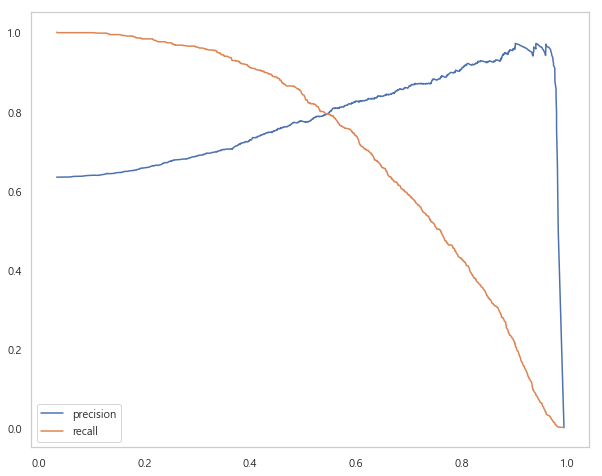

In [30]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize = (10,8))
pred = lr.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, pred)
plt.plot(thresholds,precision[:len(thresholds)], label = 'precision' )
plt.plot(thresholds,recall[:len(thresholds)], label = 'recall' )
plt.grid(); plt.legend(); plt.show()

### 간단한 확인

In [34]:
import numpy as np
#threshold 0.5
pred = lr.predict_proba(x_test)
np.concatenate([pred, y_pred_test.reshape(-1,1)], axis = 1)

array([[0.40552924, 0.59447076, 1.        ],
       [0.50932788, 0.49067212, 0.        ],
       [0.10222549, 0.89777451, 1.        ],
       ...,
       [0.22542593, 0.77457407, 1.        ],
       [0.67394864, 0.32605136, 0.        ],
       [0.31456076, 0.68543924, 1.        ]])

In [40]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.6).fit(pred)
pred_bin = binarizer.transform(pred)[:,1]
pred_bin

print(classification_report(y_test, pred_bin))

             precision    recall  f1-score   support

          0       0.62      0.73      0.67       477
          1       0.82      0.74      0.78       823

avg / total       0.75      0.73      0.74      1300



### 앙상블 기법
- 앙상블은 전통적으로 Voting, Bgging, Boosting, 스태깅 등으로 나눈다.
- `부스팅` : 단순하고 성능이 낮은 모델을 여러번 돌려서 이전 분류기가 틀린 데이터에 대해 다음 분류기가 학습을 이어 진행함
    - 전반적으로 성능이 뛰어나 앙상블 학습을 주도하고 있다: `그래디언트부스트`, `XGBoost`, `LightGBM`
    


In [41]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(url, index_col = 0)
wine['taste'] = [1 if grade>5 else 0 for grade in wine.quality]
x = wine.drop(['taste','quality'], axis = 1)
y = wine['taste']



### 스케일링

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_sc = sc.fit_transform(x)

### 스케일링 적용 후 훈련, 테스트 분리

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 13)


### 모든 컬럼의 히스토그램 조사
- `chlorides` , `color`, `taste` 등 유의해서 볼 것

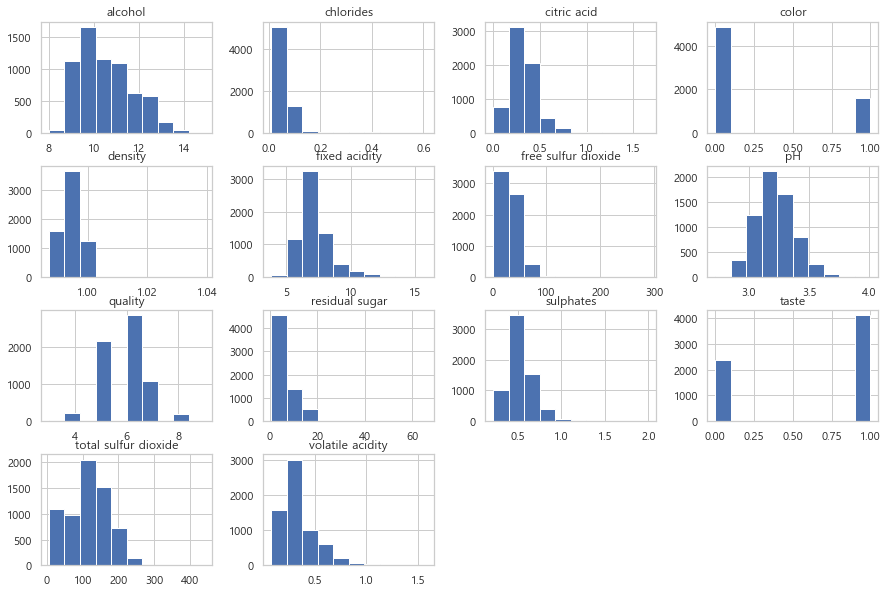

In [47]:
wine.hist(bins = 10, figsize = (15,10))
plt.show()

In [48]:
wine.groupby('quality').median()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,taste
quality,,,,,,,,,,,,,
3,7.45,0.415,0.33,3.15,0.0550,17.0,102.5,0.995900,3.245,0.505,10.15,0,0
4,7.00,0.380,0.26,2.20,0.0505,15.0,102.0,0.994995,3.220,0.485,10.00,0,0
5,7.10,0.330,0.30,3.00,0.0530,27.0,127.0,0.996100,3.190,0.500,9.60,0,0
6,6.90,0.270,0.31,3.10,0.0460,29.0,117.0,0.994700,3.210,0.510,10.50,0,1
7,6.90,0.270,0.32,2.80,0.0390,30.0,114.0,0.992400,3.220,0.520,11.40,0,1
8,6.80,0.280,0.32,4.10,0.0370,34.0,118.0,0.991890,3.230,0.480,12.00,0,1
9,7.10,0.270,0.36,2.20,0.0310,28.0,119.0,0.990300,3.280,0.460,12.50,0,1


In [50]:
wine.corr()['quality']

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.305858
pH                      0.019506
sulphates               0.038485
alcohol                 0.444319
quality                 1.000000
color                  -0.119323
taste                   0.814484
Name: quality, dtype: float64

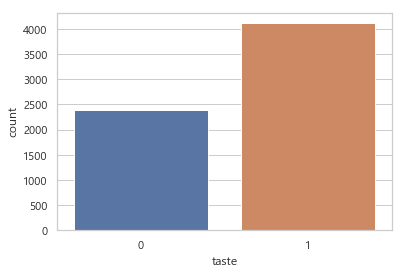

In [51]:
sns.countplot(wine.taste)
plt.show()

### 다양한 모델 한번에 시도하기

In [52]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

models


[('RandomForestClassifier',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)),
 ('DecisionTreeClassifier',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('AdaBoostClassifier',
  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
            learning_rate=1.0, n_estimators=50, random_s

In [53]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []
for name, model in models:
    #모델 별 5번씩 테스트 하고, 평균과 분산을 계산
    kfold = KFold(n_splits = 5, random_state = 13, shuffle = True)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    
    print(name, cv_results.mean(), cv_results.std())

RandomForestClassifier 0.7996890501221589 0.009825205340406564
DecisionTreeClassifier 0.7562015991708003 0.010392664315769837
AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifier 0.7663959428444511 0.021596556352125432
LogisticRegression 0.741963796549937 0.01301991538882277


### 시각화

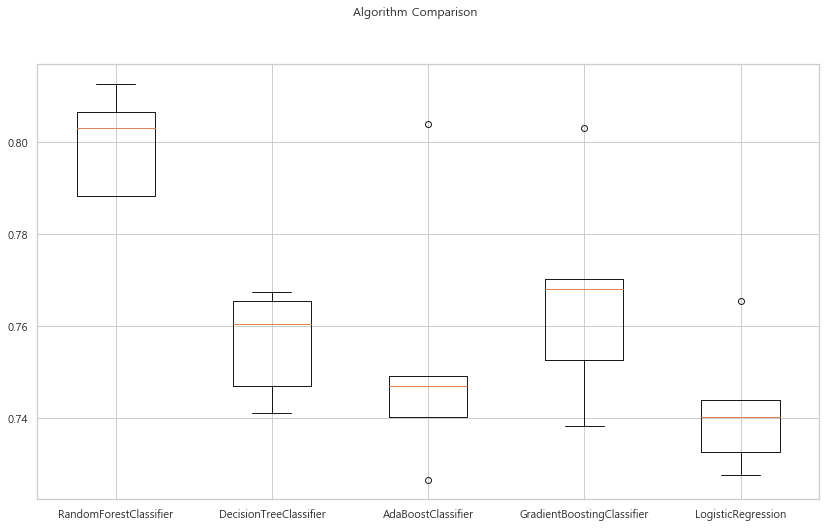

In [56]:
fig = plt.figure(figsize = (14,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 테스트 데이터에 대한 평가

In [57]:
for name,model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(name, accuracy_score(y_test, pred))

RandomForestClassifier 0.8161538461538461
DecisionTreeClassifier 0.7761538461538462
AdaBoostClassifier 0.7553846153846154
GradientBoostingClassifier 0.7884615384615384
LogisticRegression 0.7438461538461538


In [96]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

df = pd.read_csv(url, sep = '\s+', header = None, names = ['column_index','column_name'])
feature_name = df.iloc[:,1].values.tolist()
feature_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [97]:
x_train = pd.read_csv('X_train.txt', sep = '\s+', header = None)
x_test = pd.read_csv('X_test.txt', sep = '\s+', header = None)
x_train.shape
x_train.columns = feature_name
x_test.columns = feature_name

In [98]:
y_train = pd.read_csv('y_train.txt', sep = '\s+', header = None, names = ['action'])
y_test = pd.read_csv('y_test.txt', sep = '\s+', header = None, names = ['action'])

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

In [100]:
start_time = time.time()
model = GradientBoostingClassifier(random_state = 13)
model.fit(x_train, y_train)
predict = model.predict(x_test)

print(accuracy_score(y_test, predict))
print(time.time() - start_time)


0.9372242958941296
312.32017946243286


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100,500],
    'learningGradientBoostingClassifierate' : [0.05, 0.1]
}
start = time.time()
grid = GridSearchCV(model, param_grid = params, cv= 2, verbose =1,n_jobs = -1)
grid.fit(x_train, y_train)
print(time.time() - start)

### XGBoost
- 조기 종료 조건과 검증 데이터를 지정할 수 있다.

In [102]:
from xgboost import XGBClassifier
start = time.time()
xgb= XGBClassifier(n_estimator = 400, learning_rate = 0.1, max_depth = 3)
xgb.fit(x_train.values, y_train)
print(time.time()  - start)

174.37636160850525


In [115]:
evals = [(x_test.values, y_test)]
start= time.time()
xgb= XGBClassifier(n_estimator = 400, learning_rate = 0.1, max_depth = 3)
xgb.fit(x_train.values, y_train, early_stopping_rounds = 10, eval_set = evals)
print(time.time()  - start)

[0]	validation_0-merror:0.17916
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.16288
[2]	validation_0-merror:0.15100
[3]	validation_0-merror:0.14388
[4]	validation_0-merror:0.14252
[5]	validation_0-merror:0.13336
[6]	validation_0-merror:0.12521
[7]	validation_0-merror:0.12453
[8]	validation_0-merror:0.11978
[9]	validation_0-merror:0.11707
[10]	validation_0-merror:0.11130
[11]	validation_0-merror:0.10892
[12]	validation_0-merror:0.10960
[13]	validation_0-merror:0.10655
[14]	validation_0-merror:0.10485
[15]	validation_0-merror:0.10248
[16]	validation_0-merror:0.10078
[17]	validation_0-merror:0.09773
[18]	validation_0-merror:0.09841
[19]	validation_0-merror:0.09637
[20]	validation_0-merror:0.09569
[21]	validation_0-merror:0.09603
[22]	validation_0-merror:0.09637
[23]	validation_0-merror:0.09671
[24]	validation_0-merror:0.09399
[25]	validation_0-merror:0.09264
[26]	validation_0-merror:0.09196
[27]	validation_0-merror:0.09230
[28]	validation_0-m

### LightGBM
- 속도가 가장 큰 강점, 적어도 10000개 이상의 데이터가 필요하다
- GPU도 존재함

In [116]:
from lightgbm import LGBMClassifier
evals = [(x_test.values, y_test)]
start = time.time()
lgbm = LGBMClassifier(n_estimators = 400)
lgbm.fit(x_train.values, y_train, early_stopping_rounds = 10, eval_set = evals)
print('Fit time: :', time.time() - start)

[1]	valid_0's multi_logloss: 1.57457
Training until validation scores don't improve for 10 rounds
[2]	valid_0's multi_logloss: 1.40575
[3]	valid_0's multi_logloss: 1.27229
[4]	valid_0's multi_logloss: 1.15846
[5]	valid_0's multi_logloss: 1.06183
[6]	valid_0's multi_logloss: 0.976362
[7]	valid_0's multi_logloss: 0.904415
[8]	valid_0's multi_logloss: 0.840532
[9]	valid_0's multi_logloss: 0.785064
[10]	valid_0's multi_logloss: 0.734836
[11]	valid_0's multi_logloss: 0.689421
[12]	valid_0's multi_logloss: 0.648672
[13]	valid_0's multi_logloss: 0.613365
[14]	valid_0's multi_logloss: 0.580079
[15]	valid_0's multi_logloss: 0.548716
[16]	valid_0's multi_logloss: 0.520837
[17]	valid_0's multi_logloss: 0.494844
[18]	valid_0's multi_logloss: 0.471962
[19]	valid_0's multi_logloss: 0.45094
[20]	valid_0's multi_logloss: 0.432027
[21]	valid_0's multi_logloss: 0.414189
[22]	valid_0's multi_logloss: 0.398179
[23]	valid_0's multi_logloss: 0.383103
[24]	valid_0's multi_logloss: 0.369844
[25]	valid_0's mul